<a href="https://colab.research.google.com/github/amalmon/RETAIL-SALES-PREDICTION/blob/main/AMAL_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##### libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly
import plotly.graph_objs as go
#import plotly.plotly as py
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rossmann_stores_data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /Rossmann Stores Data.csv',parse_dates=True,index_col = 'Date')

In [4]:
store_data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /store.csv')

In [5]:
#have a glance on a datasets
print('observations & features',rossmann_stores_data.shape)
rossmann_stores_data.head()

observations & features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [6]:
rossmann_stores_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [7]:
print('observations & features',store_data.shape)
store_data.head()

observations & features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### **check whether any duplicate entries**

In [8]:
#for duplicates
rossmann_stores_data.duplicated().sum()

152740

In [9]:
store_data.duplicated().sum()

0

# **Dealing With Missing Values**
Count missing values in each dataset

In [10]:
print('rossmann_stores_data:\n\n',rossmann_stores_data.isnull().sum(),
      '\n\nstore_data:\n\n',store_data.isnull().sum())

rossmann_stores_data:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store_data:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


### **replacing missing values with appropriate values**

In [11]:
store_data ['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode()[0],inplace = True)
store_data ['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0],inplace = True)
store_data ['Promo2SinceWeek'].fillna(0, inplace =True)
store_data ['Promo2SinceYear'].fillna(0, inplace =True)
store_data ['PromoInterval'].fillna(0, inplace =True)

Text(0.5, 1.0, 'distribution of store competition distance')

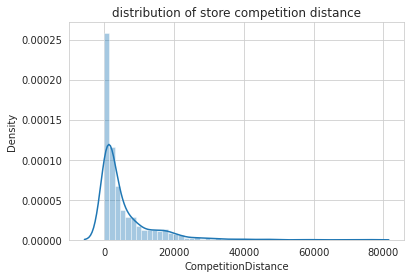

In [12]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store_data.CompetitionDistance.dropna())
plt.title("distribution of store competition distance")

The distribution is right skewed, so we'll replace missing values with the median.

In [13]:
# replace missing values in CompetitionDistance with median for the store dataset
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.median(),inplace=True)

Text(0.5, 1.0, 'distribution of Customers')

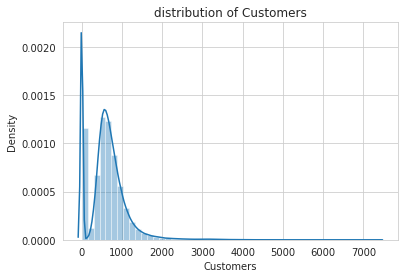

In [14]:
sns.distplot(rossmann_stores_data.Customers.dropna())
plt.title("distribution of Customers")

In [15]:
rossmann_stores_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1


## **2.3 Date Extraction**

In [16]:
# extract year, month, day and week of year from "Date"
rossmann_stores_data['year']=rossmann_stores_data.index.year
rossmann_stores_data['month']=rossmann_stores_data.index.month
rossmann_stores_data['day'] =rossmann_stores_data.index.day
rossmann_stores_data['weekofyear']=rossmann_stores_data.index.weekofyear
rossmann_stores_data=rossmann_stores_data.reset_index()


## **2.4 Joining Tables**

In [17]:
final_df=pd.merge(rossmann_stores_data,store_data,how='left',on='Store')
final_df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,weekofyear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [18]:
len(final_df)

1017209

### **Removing zero sale entries**

In [19]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
final_df=final_df[final_df.Open!=0]

In [20]:
# Open isn't a variable anymore, so we'll drop it
#del df['Open']
final_df=final_df.drop('Open', axis=1)

In [21]:
# see if there's any opened store with zero sales
final_df[final_df.Sales==0]['Store'].sum()

31460

In [22]:
# see the percentage of open stored with zero sales
final_df[final_df.Sales==0]['Sales'].sum()/final_df.Sales.sum()

0.0

In [23]:
# remove this part of data to avoid bias
final_df=final_df[final_df.Sales!=0]

##**EDA**

#### **heat map for correlation**

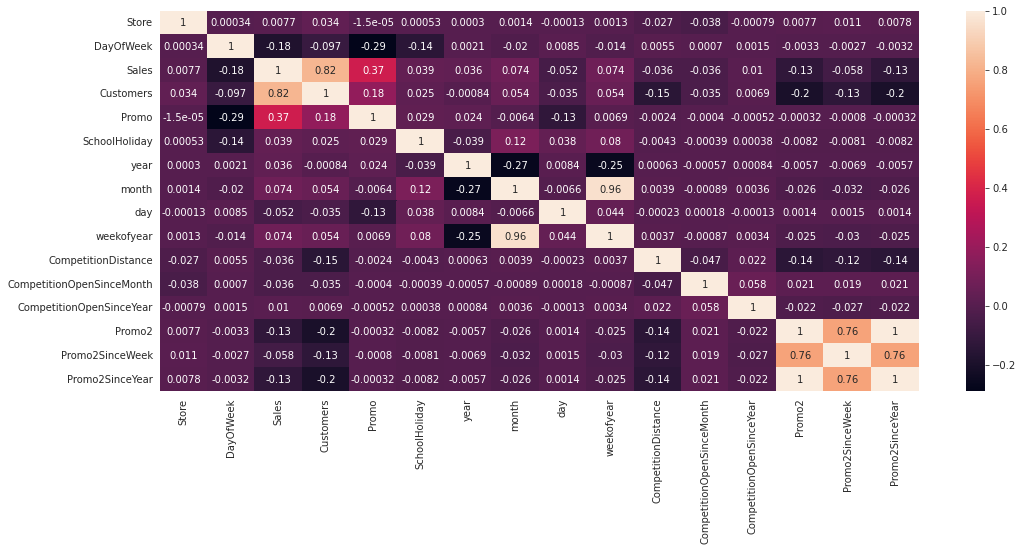

In [24]:
#for correlation matrix
plt.figure(figsize=(17,7))
sns.heatmap(final_df.corr(),annot=True)

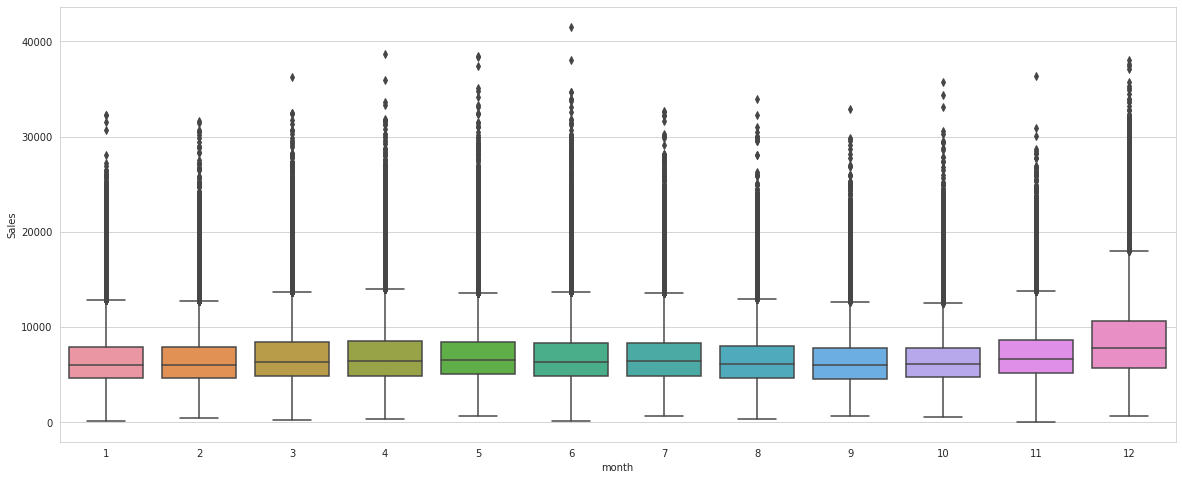

In [25]:
fig, ax = plt.subplots(figsize=(20, 8));
sns.boxplot(data = final_df, x = "month", y = "Sales", ax=ax)

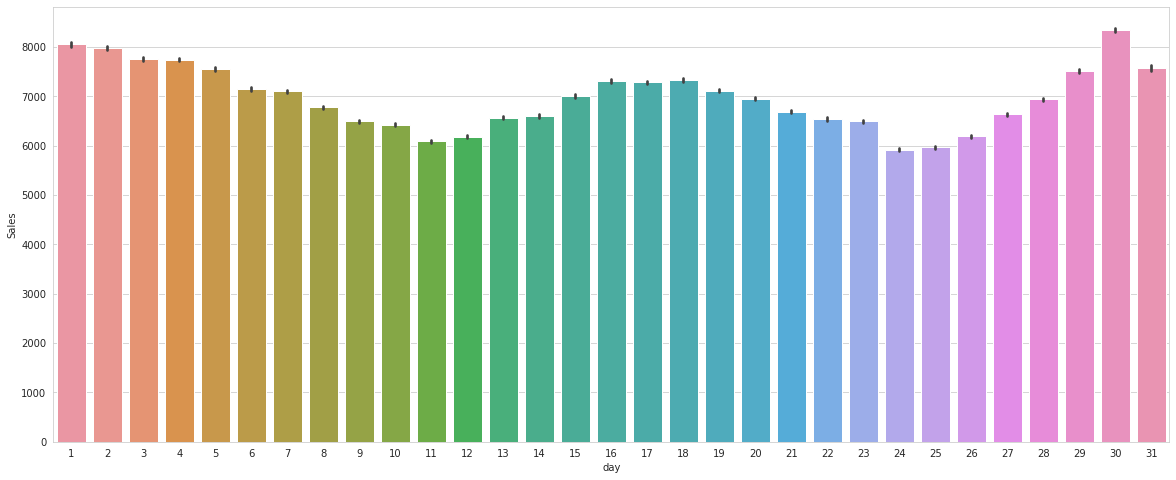

In [26]:
fig, ax = plt.subplots(figsize=(20, 8));
sns.barplot(data = final_df, x = "day", y = "Sales", ax=ax)


Day of week v/s sales

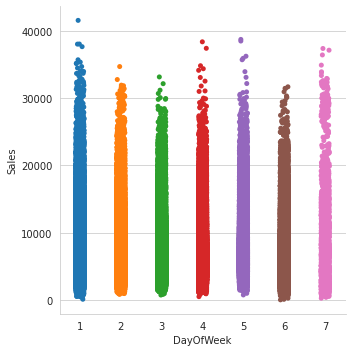

In [27]:
#catplot
sns.catplot(data=final_df,x='DayOfWeek',y='Sales')

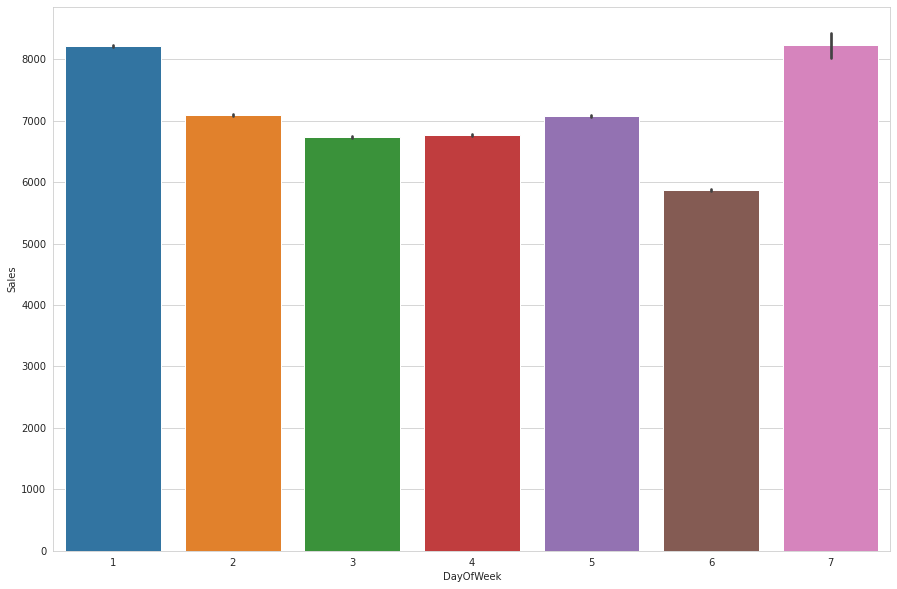

In [28]:
# DayOfWeek vs Sales
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="DayOfWeek", y="Sales", data=final_df)
# => Sunday sales is low

## **visualization**

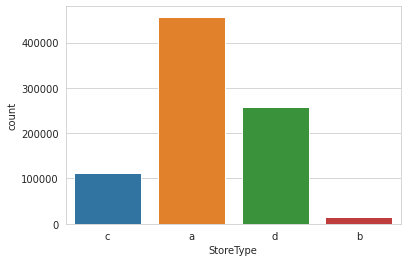

In [29]:
ax = sns.countplot(final_df['StoreType'])

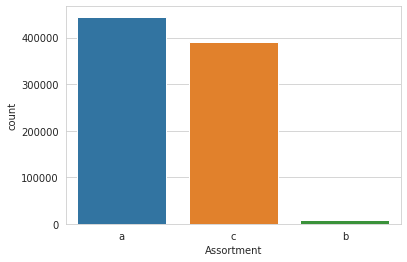

In [30]:
ax = sns.countplot(final_df['Assortment'])

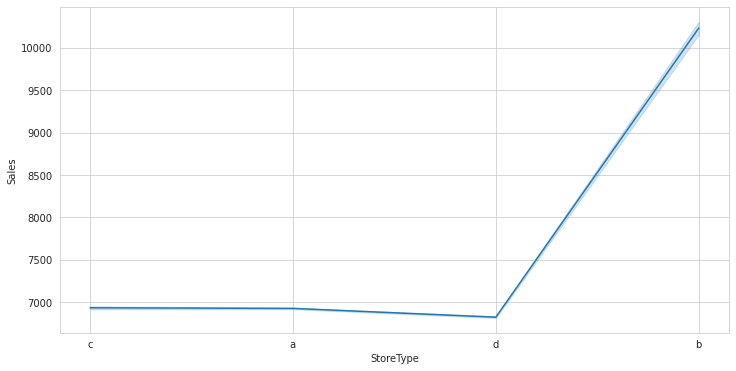

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='StoreType',y='Sales',data=final_df)

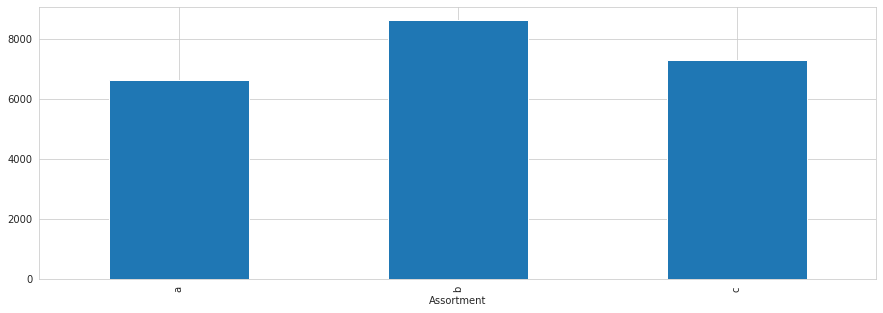

In [32]:
bplt1=final_df.groupby(['Assortment'])['Sales'].mean().plot.bar(figsize=(15,5))

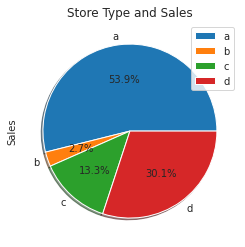

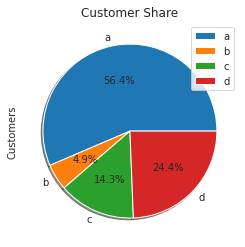

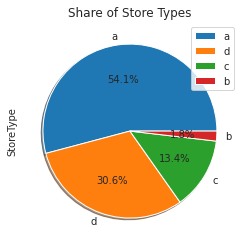

In [34]:
#Store Type and Sales Exploration
store_type = final_df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

#let's explore store type a bit and it's influence on sales
final_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
final_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
final_df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

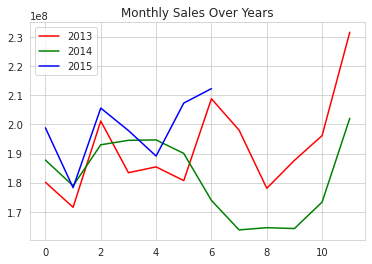

In [39]:
#sales over the years
sales_df_2013 = final_df[final_df['year']== 2013]
sales_df_2014 = final_df[final_df['year']==2014]
sales_df_2015 = final_df[final_df['year']== 2015]
#monthly sales
sales_2013 = sales_df_2013.groupby('month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('month')['Sales'].sum().reset_index()
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='green')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='blue')
plt.title('Monthly Sales Over Years')
plt.legend()

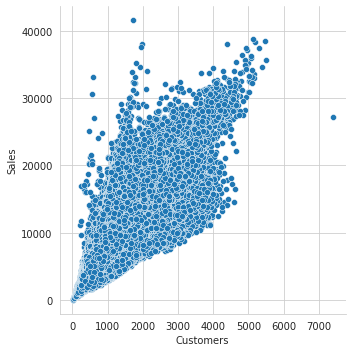

In [ ]:
#Customers vs Sales
sns.relplot(data=final_df, x='Customers',y='Sales')

**disrtibution of sales**

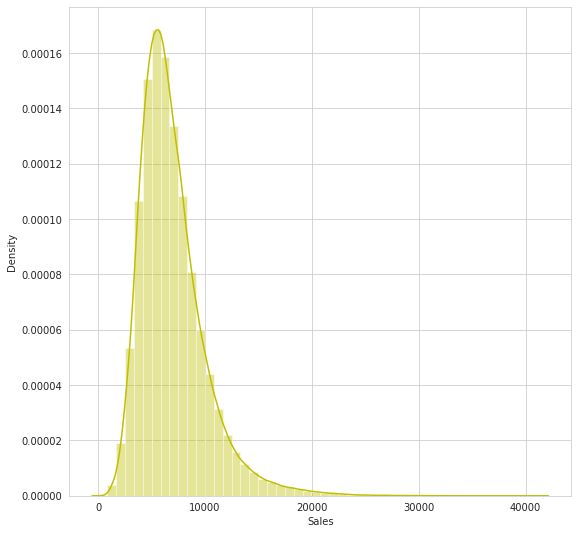

In [33]:
plt.figure(figsize=(9,9))
sns.distplot(final_df['Sales'],color="y")

# **Feature Engineering**

In [ ]:
# make a copy in case I mess up anything 
df=final_df.copy()

In [ ]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,...,weekofyear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       844338 non-null  datetime64[ns]
 1   Store                      844338 non-null  int64         
 2   DayOfWeek                  844338 non-null  int64         
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   year                       844338 non-null  int64         
 9   month                      844338 non-null  int64         
 10  day                        844338 non-null  int64         
 11  weekofyear                 844338 non-null  int64  

In [ ]:
# see what's in nominal varibles 
set(df.StateHoliday),set(df.StoreType),set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [ ]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday==0,'StateHoliday']=df.loc[df.StateHoliday==0,'StateHoliday'].astype(str)

### **2.6.3 Transform Variable "StateHoliday"**

In [ ]:
# 0 - not a state holiday; 1- is on a state holiday
df['StateHoliday']=df.StateHoliday.map({'0':0,'a':1,'b':1,'c':1,})

Text(0.5, 1.0, 'distribution of Customers')

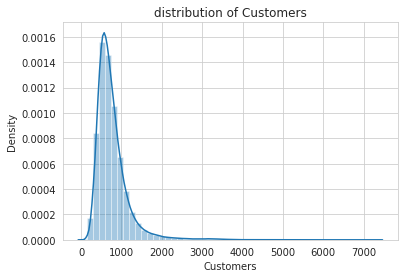

In [ ]:
sns.distplot(df.Customers.dropna())
plt.title("distribution of Customers")

# STORE SALE PREDICTION

In [ ]:
X=df.drop('Sales',axis=1)
Y=df.Sales

In [ ]:
# get dummy variables for categorical features for linear regression
xd=X.copy()
xd=pd.get_dummies(xd)

In [ ]:
xd

,Date,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,2015-07-31,1,5,555,1,0,1,2015,7,31,...,0,1,0,1,0,0,1,0,0,0
1,2015-07-31,2,5,625,1,0,1,2015,7,31,...,0,0,0,1,0,0,0,0,1,0
2,2015-07-31,3,5,821,1,0,1,2015,7,31,...,0,0,0,1,0,0,0,0,1,0
3,2015-07-31,4,5,1498,1,0,1,2015,7,31,...,0,1,0,0,0,1,1,0,0,0
4,2015-07-31,5,5,559,1,0,1,2015,7,31,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,2013-01-01,682,2,566,0,1,1,2013,1,1,...,1,0,0,1,0,0,1,0,0,0
1016827,2013-01-01,733,2,2377,0,1,1,2013,1,1,...,1,0,0,0,1,0,1,0,0,0
1016863,2013-01-01,769,2,1248,0,1,1,2013,1,1,...,1,0,0,0,1,0,0,0,1,0
1017042,2013-01-01,948,2,1039,0,1,1,2013,1,1,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
xd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            844338 non-null  datetime64[ns]
 1   Store                           844338 non-null  int64         
 2   DayOfWeek                       844338 non-null  int64         
 3   Customers                       844338 non-null  int64         
 4   Promo                           844338 non-null  int64         
 5   StateHoliday                    844338 non-null  int64         
 6   SchoolHoliday                   844338 non-null  int64         
 7   year                            844338 non-null  int64         
 8   month                           844338 non-null  int64         
 9   day                             844338 non-null  int64         
 10  weekofyear                      844338 non-null  int64 

In [ ]:
del xd['Date']
del xd['year']
del xd['month']
del xd['day']


In [ ]:
del xd['weekofyear']

In [ ]:
del xd['DayOfWeek']

In [ ]:
xd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           844338 non-null  int64  
 1   Customers                       844338 non-null  int64  
 2   Promo                           844338 non-null  int64  
 3   StateHoliday                    844338 non-null  int64  
 4   SchoolHoliday                   844338 non-null  int64  
 5   CompetitionDistance             844338 non-null  float64
 6   CompetitionOpenSinceMonth       844338 non-null  float64
 7   CompetitionOpenSinceYear        844338 non-null  float64
 8   Promo2                          844338 non-null  int64  
 9   Promo2SinceWeek                 844338 non-null  float64
 10  Promo2SinceYear                 844338 non-null  float64
 11  StoreType_a                     844338 non-null  uint8  
 12  StoreType_b    

In [ ]:
xd

,Store,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,555,1,0,1,1270.0,9.0,2008.0,0,0.0,...,0,1,0,1,0,0,1,0,0,0
1,2,625,1,0,1,570.0,11.0,2007.0,1,13.0,...,0,0,0,1,0,0,0,0,1,0
2,3,821,1,0,1,14130.0,12.0,2006.0,1,14.0,...,0,0,0,1,0,0,0,0,1,0
3,4,1498,1,0,1,620.0,9.0,2009.0,0,0.0,...,0,1,0,0,0,1,1,0,0,0
4,5,559,1,0,1,29910.0,4.0,2015.0,0,0.0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,566,0,1,1,150.0,9.0,2006.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
1016827,733,2377,0,1,1,860.0,10.0,1999.0,0,0.0,...,1,0,0,0,1,0,1,0,0,0
1016863,769,1248,0,1,1,840.0,9.0,2013.0,1,48.0,...,1,0,0,0,1,0,0,0,1,0
1017042,948,1039,0,1,1,1430.0,9.0,2013.0,0,0.0,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
# split training and test datasets
from sklearn.model_selection import train_test_split

xd_test,xd_train,yd_test,yd_train=train_test_split(xd,Y,test_size=0.2,random_state=1)
#xl_test,xl_train,yl_test,yl_train=train_test_split(xl,Y,test_size=0.2,random_state=1)

# linear regression

# Linear Regression

based on the ordinary least squares (OLS) method.

it is used to estimate the unknown parameters in amodel.

The method relies on minimizing the sum of squared residuals between the actual and predicted values

In [ ]:

from sklearn.linear_model import LinearRegression
lin=LinearRegression()
linreg=lin.fit(xd_train,yd_train)

In [ ]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
  return sqrt(mean_squared_error(x,y))
  

In [ ]:
# definte MAPE function (mean absolute percentage error function)
def mape(x, y):
  return np.mean(np.abs((x-y)/x))*100

In [ ]:
# get cross validation scores 
yd_predicted=linreg.predict(xd_train)
yd_test_predicted=linreg.predict(xd_test)

In [ ]:
print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))



Regresion Model Score : 0.8239205831037937 , Out of Sample Test Score : 0.824057298037182
Training RMSE : 1296.4612841830492 Testing RMSE : 1303.3867024695276
Training MAPE : 14.35517189603885 Testing MAPE : 14.318483491619796


In [ ]:
from sklearn.metrics import r2_score 
r2_score(yd_test_predicted,yd_test)

0.7853041710196935

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score(yd_test,yd_test_predicted))*((xd_test.shape[0]-1)/(xd_test.shape[0]-xd_test.shape[1]-1)))

Adjusted R2 :  0.8240515674033304


# **LARS Lasso Regression**

In [ ]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))



Regresion Model Score : 0.8234839848872532 , Out of Sample Test Score : 0.82359159476427
Training RMSE : 1298.067611179723 Testing RMSE : 1305.1105316345459
Training MAPE : 14.374883518249407 Testing MAPE : 14.34137755543334


In [ ]:
from sklearn.metrics import r2_score 
r2_score(yd_test_predicted,yd_test)

0.7844873178414141

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score(yd_test,yd_test_predicted))*((xd_test.shape[0]-1)/(xd_test.shape[0]-xd_test.shape[1]-1)))

Adjusted R2 :  0.8235858489619863


###**Bayesian Ridge Regression**

In [ ]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [ ]:
# validation
print("Regresion Model Score" , ":" ,rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))



Regresion Model Score : 0.8239194221176935 , Out of Sample Test Score : 0.8240549092801628
Training RMSE : 1296.4655583085425 Testing RMSE : 1303.3955504169892
Training MAPE : 14.355484066795935 Testing MAPE : 14.31881802085486


In [ ]:
from sklearn.metrics import r2_score 
r2_score(yd_test_predicted,yd_test)

0.785291054301916

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score(yd_test,yd_test_predicted))*((xd_test.shape[0]-1)/(xd_test.shape[0]-xd_test.shape[1]-1)))

Adjusted R2 :  0.8240491785685069


## **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , treereg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xd_test, yd_test))

yd_train_predicted = treereg.predict(xd_train)
yd_test_predicted = treereg.predict(xd_test)
print("Training RMSE", ":", rmse(yd_train, yd_train_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_train_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.9453541868341278 , Out of Sample Test Score : 0.9307099961166266
Training RMSE : 722.2436012748586 Testing RMSE : 817.9428306666268
Training MAPE : 7.1193211062111335 Testing MAPE : 7.917444159929356


In [ ]:
from sklearn.metrics import r2_score 
r2_score(yd_test_predicted,yd_test)

0.9262547309370291

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score(yd_test,yd_test_predicted))*((xd_test.shape[0]-1)/(xd_test.shape[0]-xd_test.shape[1]-1)))

Adjusted R2 :  0.9307077392702932


## **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , rdfreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xd_test, yd_test))   

yd_train_predicted = rdfreg.predict(xd_train)
yd_test_predicted = rdfreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_train_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_train_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.9927444290327988 , Out of Sample Test Score : 0.9582908219710101
Training RMSE : 263.17283179347277 Testing RMSE : 634.6049756713666
Training MAPE : 2.5901293923036337 Testing MAPE : 6.2389132484685845


In [ ]:
from sklearn.metrics import r2_score 
r2_score(yd_test_predicted,yd_test)

0.9564162466904774

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score(yd_test,yd_test_predicted))*((xd_test.shape[0]-1)/(xd_test.shape[0]-xd_test.shape[1]-1)))

Adjusted R2 :  0.9582894634603991


Text(0.5, 0, 'Relative Importance')

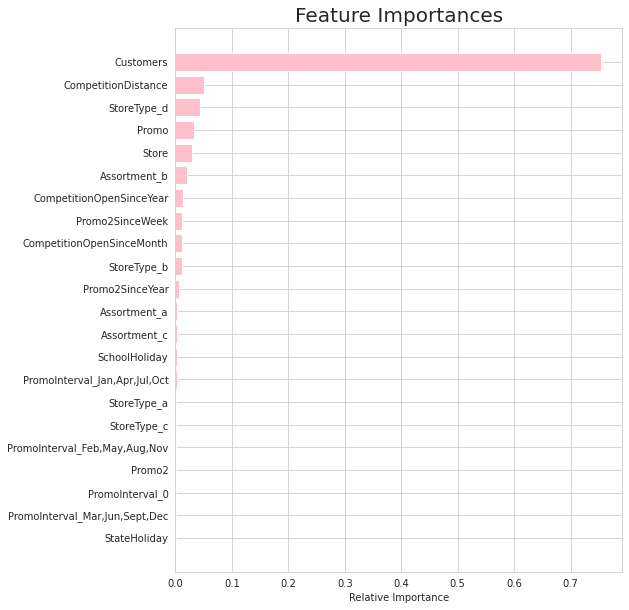

In [ ]:
features = xd_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')